In [1]:
%matplotlib inline
import numpy as np
import numpy.random as npr
import pymc3 as pm
import matplotlib.pyplot as plt

Especifíquese la semilla para reproducibilidad

In [2]:
npr.seed(0)

Especifíquese el valor real de $\theta$ y genérese la observación

In [3]:
q = 0.4
N = 100
yobs = np.random.binomial(N, q, 1)
print('y = ', yobs)

y =  [46]


Especifíquese el modelo Bayesiano:
- La distribución de $\Theta$, $p_\Theta(\theta) = U(\theta \mid 0, 1)$
- La distribución de $Y$ dado $\Theta$, $p_{Y \mid \Theta}(y \mid \theta) = \mathrm{Binomial}(y \mid \theta)$

In [4]:
model = pm.Model()
with model:
    q = pm.Uniform('q', lower=0, upper=1)
    y = pm.Binomial('y', N, q, observed=yobs)

Genérense las muestras de la distribución condicional $p_{\Theta \mid Y}(\theta \mid y)$

In [5]:
with model:
    trace = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [q]
Sampling 4 chains: 100%|██████████| 22000/22000 [00:03<00:00, 6935.13draws/s]


(0, 1)

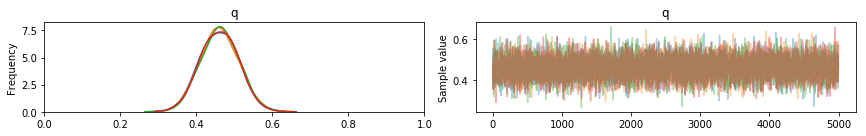

In [6]:
axes = pm.traceplot(trace);
axes[0][0].set_xlim(0, 1)

Más detalles de la distribución condicional:

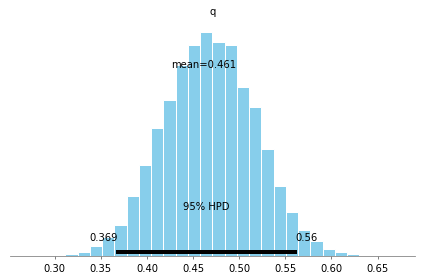

In [7]:
pm.plot_posterior(trace)